In [1]:
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr

Text(0.5, 1.0, 'Climatologia da temperatura em dezembro 1981-2010')

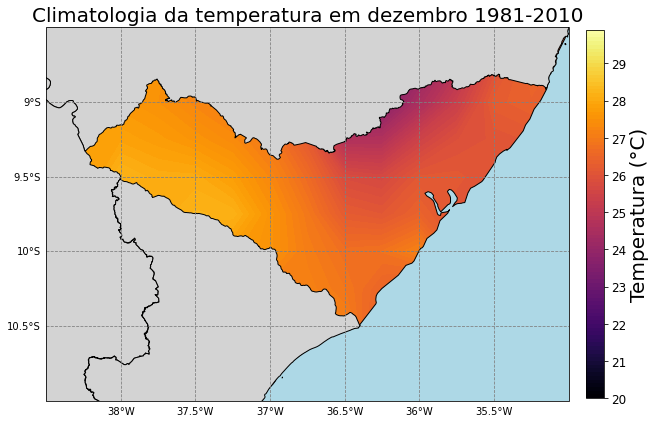

In [2]:

#Abrindo arquivo .nc
ds = xr.open_dataset('Temp_2m_clima_1981-2010-AL.nc')
t = ds['t2m'] - 273.15
lon, lat = np.meshgrid(t.longitude, t.latitude)
time = ds['time']

#Criando figura e adicionando features
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-38.5, -35, -11, -8.5], ccrs.PlateCarree())
#ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), zorder=2, edgecolor='black', facecolor='lightblue')
#ax.add_feature(cfeature.LAKES, alpha=1.0)
#ax.add_feature(cfeature.LAND)

#Aplicando contorno
im = ax.contourf(lon, lat, t.isel(time=11), 
                 levels=np.arange(20, 30, 0.1), cmap='inferno',
                 transform=ccrs.PlateCarree())

#Lendo arquivos .shp
#shape_AL = ShapelyFeature(shpreader.Reader('AL_UF_2021/AL_UF_2021.shp').geometries(),\
# ccrs.PlateCarree(), zorder=1, facecolor='none', edgecolor='k', linewidth=1.0)
#ax.add_feature(shape_AL)
shape_PE = ShapelyFeature(shpreader.Reader('PE_UF_2021/PE_UF_2021.shp').geometries(),\
 ccrs.PlateCarree(), zorder=2, facecolor='lightgray', edgecolor='k', linewidth=1.0)
ax.add_feature(shape_PE)
shape_BA = ShapelyFeature(shpreader.Reader('BA_UF_2021/BA_UF_2021.shp').geometries(),\
 ccrs.PlateCarree(), zorder=2, facecolor='lightgray', edgecolor='k', linewidth=1.0)
ax.add_feature(shape_BA)
shape_SE = ShapelyFeature(shpreader.Reader('SE_UF_2021/SE_UF_2021.shp').geometries(),\
 ccrs.PlateCarree(), zorder=2, facecolor='lightgray', edgecolor='k', linewidth=1.0)
ax.add_feature(shape_SE)

#Adicionando colorbar para a legenda
cbar = plt.colorbar(im, ax=ax, pad=0.03, fraction=0.033)
cbar.set_label(label='Temperatura (°C)', size=20)
cbar.ax.tick_params(labelsize=12)

#Linhas da grade e Coordenadas geográficas
gd = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)
gd.right_labels = False
gd.top_labels = False

ax.set_title('Climatologia da temperatura em dezembro 1981-2010', size=20)

plt.savefig('NomeFigura.png', dpi=300, bbox_inches='tight')